In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Hackathon/Sentiment_analysis_results/final_final_final_xd.xlsx')

In [ ]:
df

,Unnamed: 0,airline,Text,country,Low Cost,Present,LDA Topics,Present_LDA,labels,scores
0,0,Aegean Airlines,middle seat was kept empty Seating seemed to ...,United Kingdom,False,1.0,"['seat', 'plane', 'flight', 'extra', 'leg', 'r...",1.0,"['joy', 'neutral']","scores: [tensor(0.6664, grad_fn=<UnbindBackwar..."
1,1,Aegean Airlines,have to pay for extra leg room Very good over...,Greece,False,1.0,"['seat', 'plane', 'flight', 'extra', 'leg', 'r...",1.0,"['disgust', 'joy']","scores: [tensor(0.6633, grad_fn=<UnbindBackwar..."
2,2,Aegean Airlines,Never had less legroom Never had less legroom...,Switzerland,False,1.0,"['seat', 'plane', 'flight', 'extra', 'leg', 'r...",1.0,['neutral'],"scores: [tensor(0.7906, grad_fn=<UnbindBackwar..."
3,3,Aegean Airlines,little leg space at all Horrible experience. ...,Greece,False,1.0,"['seat', 'plane', 'flight', 'extra', 'leg', 'r...",1.0,['neutral'],"scores: [tensor(0.4789, grad_fn=<UnbindBackwar..."
4,4,Aegean Airlines,never had less legroom Overall Aegean is a de...,Spain,False,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,"['joy', 'neutral']","scores: [tensor(0.4891, grad_fn=<UnbindBackwar..."
...,...,...,...,...,...,...,...,...,...,...
64122,106870,wizz-air,izz Air customer revie ['After being relentles...,United Kingdom,True,1.0,"['flight', 'hour', 'time', 'plane', 'minute', ...",1.0,['neutral'],"scores: [tensor(0.7489, grad_fn=<UnbindBackwar..."
64123,106871,wizz-air,izz Air customer revie ['I am traveling about ...,Italy,True,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,['neutral'],"scores: [tensor(0.7970, grad_fn=<UnbindBackwar..."
64124,106874,wizz-air,izz Air customer revie ['Not a good experience...,United Kingdom,True,1.0,"['flight', 'airline', 'customer', 'service', '...",1.0,['surprise'],"scores: [tensor(0.7208, grad_fn=<UnbindBackwar..."
64125,106875,wizz-air,"izz Air customer revie [""A lot of people here ...",Latvia,True,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,['joy'],"scores: [tensor(0.6665, grad_fn=<UnbindBackwar..."


In [ ]:
df[df['Low Cost'] == True]

,Unnamed: 0,airline,Text,country,Low Cost,Present,LDA Topics,Present_LDA,labels,scores
74,75,Air Busan,lots of space given ['The legroom given was un...,Singapore,True,1.0,"['seat', 'plane', 'flight', 'extra', 'leg', 'r...",1.0,"['neutral', 'surprise']","scores: [tensor(0.3364, grad_fn=<UnbindBackwar..."
75,76,Air Canada,still a nice experience I flew business class...,Canada,True,1.0,"['class', 'business', 'meal', 'economy', 'food...",1.0,"['joy', 'surprise']","scores: [tensor(0.5403, grad_fn=<UnbindBackwar..."
76,77,Air Canada,"stretch your legs outward I picked seat 13A, ...",Canada,True,1.0,"['seat', 'plane', 'flight', 'extra', 'leg', 'r...",1.0,"['joy', 'neutral']","scores: [tensor(0.6596, grad_fn=<UnbindBackwar..."
77,78,Air Canada,"Lot of space Lot of space, very expensive WiF...",Denmark,True,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,"['neutral', 'sadness']","scores: [tensor(0.3354, grad_fn=<UnbindBackwar..."
78,79,Air Canada,discomfort was exacerbated My flight was 10.5...,United Kingdom,True,1.0,"['seat', 'plane', 'flight', 'extra', 'leg', 'r...",1.0,['neutral'],"scores: [tensor(0.6980, grad_fn=<UnbindBackwar..."
...,...,...,...,...,...,...,...,...,...,...
64122,106870,wizz-air,izz Air customer revie ['After being relentles...,United Kingdom,True,1.0,"['flight', 'hour', 'time', 'plane', 'minute', ...",1.0,['neutral'],"scores: [tensor(0.7489, grad_fn=<UnbindBackwar..."
64123,106871,wizz-air,izz Air customer revie ['I am traveling about ...,Italy,True,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,['neutral'],"scores: [tensor(0.7970, grad_fn=<UnbindBackwar..."
64124,106874,wizz-air,izz Air customer revie ['Not a good experience...,United Kingdom,True,1.0,"['flight', 'airline', 'customer', 'service', '...",1.0,['surprise'],"scores: [tensor(0.7208, grad_fn=<UnbindBackwar..."
64125,106875,wizz-air,"izz Air customer revie [""A lot of people here ...",Latvia,True,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,['joy'],"scores: [tensor(0.6665, grad_fn=<UnbindBackwar..."


In [ ]:
df['occ'] = df['airline'].apply(lambda x: (df['airline'] == x).sum())

In [ ]:
df

,Unnamed: 0,airline,Text,country,Low Cost,Present,LDA Topics,Present_LDA,labels,scores,occ
0,0,Aegean Airlines,middle seat was kept empty Seating seemed to ...,United Kingdom,False,1.0,"['seat', 'plane', 'flight', 'extra', 'leg', 'r...",1.0,"['joy', 'neutral']","scores: [tensor(0.6664, grad_fn=<UnbindBackwar...",14
1,1,Aegean Airlines,have to pay for extra leg room Very good over...,Greece,False,1.0,"['seat', 'plane', 'flight', 'extra', 'leg', 'r...",1.0,"['disgust', 'joy']","scores: [tensor(0.6633, grad_fn=<UnbindBackwar...",14
2,2,Aegean Airlines,Never had less legroom Never had less legroom...,Switzerland,False,1.0,"['seat', 'plane', 'flight', 'extra', 'leg', 'r...",1.0,['neutral'],"scores: [tensor(0.7906, grad_fn=<UnbindBackwar...",14
3,3,Aegean Airlines,little leg space at all Horrible experience. ...,Greece,False,1.0,"['seat', 'plane', 'flight', 'extra', 'leg', 'r...",1.0,['neutral'],"scores: [tensor(0.4789, grad_fn=<UnbindBackwar...",14
4,4,Aegean Airlines,never had less legroom Overall Aegean is a de...,Spain,False,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,"['joy', 'neutral']","scores: [tensor(0.4891, grad_fn=<UnbindBackwar...",14
...,...,...,...,...,...,...,...,...,...,...,...
64122,106870,wizz-air,izz Air customer revie ['After being relentles...,United Kingdom,True,1.0,"['flight', 'hour', 'time', 'plane', 'minute', ...",1.0,['neutral'],"scores: [tensor(0.7489, grad_fn=<UnbindBackwar...",340
64123,106871,wizz-air,izz Air customer revie ['I am traveling about ...,Italy,True,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,['neutral'],"scores: [tensor(0.7970, grad_fn=<UnbindBackwar...",340
64124,106874,wizz-air,izz Air customer revie ['Not a good experience...,United Kingdom,True,1.0,"['flight', 'airline', 'customer', 'service', '...",1.0,['surprise'],"scores: [tensor(0.7208, grad_fn=<UnbindBackwar...",340
64125,106875,wizz-air,"izz Air customer revie [""A lot of people here ...",Latvia,True,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,['joy'],"scores: [tensor(0.6665, grad_fn=<UnbindBackwar...",340


In [ ]:
df.airline.value_counts()

british-airways              2323
united-airlines              1692
emirates                     1567
china-southern-airlines      1554
qatar-airways                1495
                             ... 
TAM Airlines                    1
Small Planet Airlines UAB       1
kan-air                         1
Hong Kong                       1
badr-airlines                   1
Name: airline, Length: 593, dtype: int64

In [ ]:
df = df[df['occ'] > 500]

In [ ]:
df['labelsstring'] = df["labels"].apply(lambda x: str(x))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,airline,Text,country,Low Cost,Present,LDA Topics,Present_LDA,labels,scores,occ,labelsstring
3047,3162,aegean-airlines,Aegean did not use to be like that Accurate d...,Greece,False,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,"['joy', 'neutral']","scores: [tensor(0.6512, grad_fn=<UnbindBackwar...",508,"['joy', 'neutral']"
3048,3163,aegean-airlines,I was 2 kilos over the limit My daughter boug...,Greece,False,1.0,"['flight', 'airline', 'customer', 'service', '...",1.0,"['anger', 'neutral']","scores: [tensor(0.3733, grad_fn=<UnbindBackwar...",508,"['anger', 'neutral']"
3049,3164,aegean-airlines,had to pay for that 60 euros My wife had a ve...,United Kingdom,False,1.0,"['bag', 'luggage', 'baggage', 'staff', 'check'...",1.0,"['anger', 'neutral']","scores: [tensor(0.3300, grad_fn=<UnbindBackwar...",508,"['anger', 'neutral']"
3050,3166,aegean-airlines,now all they have is a snack I think the theo...,Switzerland,False,1.0,"['flight', 'hour', 'time', 'plane', 'minute', ...",1.0,['surprise'],"scores: [tensor(0.5969, grad_fn=<UnbindBackwar...",508,['surprise']
3051,3167,aegean-airlines,"Efficient, friendly service Larnaca to London ...",United Kingdom,False,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,"['joy', 'neutral']","scores: [tensor(0.7752, grad_fn=<UnbindBackwar...",508,"['joy', 'neutral']"
...,...,...,...,...,...,...,...,...,...,...,...,...
61725,101871,united-airlines,"nited Airlines customer revie [""Flew Denver to...",United States,False,1.0,"['flight', 'hour', 'time', 'plane', 'minute', ...",1.0,['neutral'],"scores: [tensor(0.7054, grad_fn=<UnbindBackwar...",1692,['neutral']
61726,101872,united-airlines,"nited Airlines customer revie [""IAD to DEN. Ec...",United States,False,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,['neutral'],"scores: [tensor(0.4485, grad_fn=<UnbindBackwar...",1692,['neutral']
61727,101873,united-airlines,"nited Airlines customer revie [""We flew to Gen...",United States,False,1.0,"['flight', 'hour', 'time', 'plane', 'minute', ...",1.0,"['anger', 'neutral']","scores: [tensor(0.5432, grad_fn=<UnbindBackwar...",1692,"['anger', 'neutral']"
61728,101875,united-airlines,"nited Airlines customer revie [""I purchased fi...",United States,False,1.0,"['flight', 'airline', 'customer', 'service', '...",1.0,[],scores: [],1692,[]


In [ ]:
df['LDA'] = df["LDA Topics"].apply(lambda x: str(x))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,airline,Text,country,Low Cost,Present,LDA Topics,Present_LDA,labels,scores,occ,labelsstring,LDA
3047,3162,aegean-airlines,Aegean did not use to be like that Accurate d...,Greece,False,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,"['joy', 'neutral']","scores: [tensor(0.6512, grad_fn=<UnbindBackwar...",508,"['joy', 'neutral']","['flight', 'good', 'crew', 'food', 'service', ..."
3048,3163,aegean-airlines,I was 2 kilos over the limit My daughter boug...,Greece,False,1.0,"['flight', 'airline', 'customer', 'service', '...",1.0,"['anger', 'neutral']","scores: [tensor(0.3733, grad_fn=<UnbindBackwar...",508,"['anger', 'neutral']","['flight', 'airline', 'customer', 'service', '..."
3049,3164,aegean-airlines,had to pay for that 60 euros My wife had a ve...,United Kingdom,False,1.0,"['bag', 'luggage', 'baggage', 'staff', 'check'...",1.0,"['anger', 'neutral']","scores: [tensor(0.3300, grad_fn=<UnbindBackwar...",508,"['anger', 'neutral']","['bag', 'luggage', 'baggage', 'staff', 'check'..."
3050,3166,aegean-airlines,now all they have is a snack I think the theo...,Switzerland,False,1.0,"['flight', 'hour', 'time', 'plane', 'minute', ...",1.0,['surprise'],"scores: [tensor(0.5969, grad_fn=<UnbindBackwar...",508,['surprise'],"['flight', 'hour', 'time', 'plane', 'minute', ..."
3051,3167,aegean-airlines,"Efficient, friendly service Larnaca to London ...",United Kingdom,False,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,"['joy', 'neutral']","scores: [tensor(0.7752, grad_fn=<UnbindBackwar...",508,"['joy', 'neutral']","['flight', 'good', 'crew', 'food', 'service', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61725,101871,united-airlines,"nited Airlines customer revie [""Flew Denver to...",United States,False,1.0,"['flight', 'hour', 'time', 'plane', 'minute', ...",1.0,['neutral'],"scores: [tensor(0.7054, grad_fn=<UnbindBackwar...",1692,['neutral'],"['flight', 'hour', 'time', 'plane', 'minute', ..."
61726,101872,united-airlines,"nited Airlines customer revie [""IAD to DEN. Ec...",United States,False,1.0,"['flight', 'good', 'crew', 'food', 'service', ...",1.0,['neutral'],"scores: [tensor(0.4485, grad_fn=<UnbindBackwar...",1692,['neutral'],"['flight', 'good', 'crew', 'food', 'service', ..."
61727,101873,united-airlines,"nited Airlines customer revie [""We flew to Gen...",United States,False,1.0,"['flight', 'hour', 'time', 'plane', 'minute', ...",1.0,"['anger', 'neutral']","scores: [tensor(0.5432, grad_fn=<UnbindBackwar...",1692,"['anger', 'neutral']","['flight', 'hour', 'time', 'plane', 'minute', ..."
61728,101875,united-airlines,"nited Airlines customer revie [""I purchased fi...",United States,False,1.0,"['flight', 'airline', 'customer', 'service', '...",1.0,[],scores: [],1692,[],"['flight', 'airline', 'customer', 'service', '..."


In [ ]:
df.labels.value_counts()

 ['joy']                               11820
 ['neutral']                            5488
 ['surprise']                           2661
 ['joy', 'surprise']                    2020
 ['sadness']                            2013
 ['joy', 'neutral']                     2004
 ['neutral', 'surprise']                1250
 ['anger', 'neutral']                    793
 ['joy', 'sadness']                      791
 []                                      710
 ['neutral', 'sadness']                  682
 ['anger']                               641
 ['sadness', 'surprise']                 613
 ['fear']                                508
 ['disgust']                             458
 ['anger', 'sadness']                    227
 ['anger', 'surprise']                   164
 ['fear', 'joy']                         121
 ['disgust', 'joy']                       99
 ['anger', 'joy']                         90
 ['anger', 'disgust']                     76
 ['joy', 'sadness', 'surprise']           67
 ['fear', 

In [ ]:
df_joy = df[df['labelsstring'].apply(lambda x:"['joy']" in x)]
df_joy['freq'] = df_joy['airline'].apply(lambda x: (df_joy['airline'] == x).sum())/df_joy['occ']
df_joy = df_joy.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_joy = df_joy.sort_values(by=['freq'])
df_joy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline,freq,count
29,spirit-airlines,0.145174,188
16,frontier-airlines,0.158568,124
33,united-airlines,0.176714,299
7,american-airlines,0.180305,260
3,air-canada-rouge,0.183626,157
19,jetstar-airways,0.210443,133
26,ryanair,0.236771,264
15,etihad-airways,0.242857,238
30,tap-portugal,0.244373,228
10,china-eastern-airlines,0.265469,133


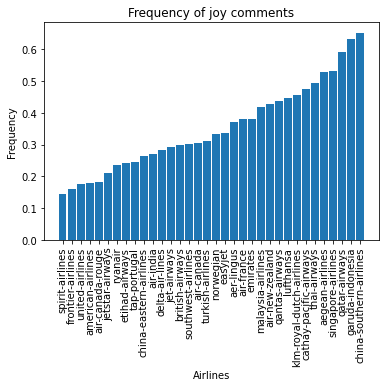

In [ ]:
f, ax = plt.subplots()

companies = df_joy['airline']
freq = df_joy['freq']

plt.bar(companies, freq)
plt.title("Frequency of joy comments")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_joy['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [ ]:
df_surprise = df[df['labelsstring'].apply(lambda x:"['surprise']" in x)]
df_surprise['freq'] = df_surprise['airline'].apply(lambda x: (df_surprise['airline'] == x).sum())/df_surprise['occ']
df_surprise = df_surprise.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_surprise = df_surprise.sort_values(by=['freq'])
df_surprise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline,freq,count
17,garuda-indonesia,0.026465,14
25,qatar-airways,0.030100,45
11,china-southern-airlines,0.030888,48
21,lufthansa,0.042837,61
31,thai-airways,0.043478,28
27,singapore-airlines,0.043757,41
0,aegean-airlines,0.051181,26
9,cathay-pacific-airways,0.055286,57
6,air-new-zealand,0.056881,31
13,easyjet,0.069006,59


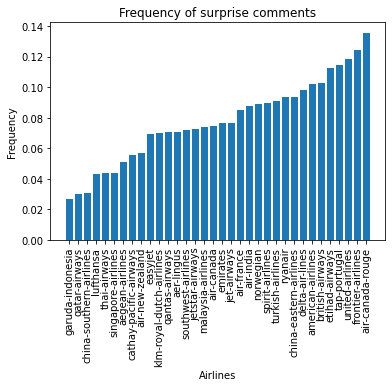

In [ ]:
f, ax = plt.subplots()

companies = df_surprise['airline']
freq = df_surprise['freq']

plt.bar(companies, freq)
plt.title("Frequency of surprise comments")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_surprise['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [ ]:
df_sadness = df[df['labelsstring'].apply(lambda x:"['sadness']" in x)]
df_sadness['freq'] = df_sadness['airline'].apply(lambda x: (df_sadness['airline'] == x).sum())/df_sadness['occ']
df_sadness = df_sadness.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_sadness = df_sadness.sort_values(by=['freq'])
df_sadness

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline,freq,count
11,china-southern-airlines,0.016731,26
17,garuda-indonesia,0.024575,13
26,ryanair,0.030493,34
25,qatar-airways,0.037458,56
0,aegean-airlines,0.039370,20
31,thai-airways,0.041925,27
29,spirit-airlines,0.043243,56
23,norwegian,0.044872,42
20,klm-royal-dutch-airlines,0.045771,46
21,lufthansa,0.047051,67


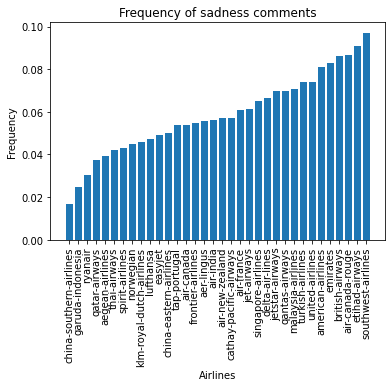

In [ ]:
f, ax = plt.subplots()

companies = df_sadness['airline']
freq = df_sadness['freq']

plt.bar(companies, freq)
plt.title("Frequency of sadness comments")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_sadness['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [ ]:
df_neutral = df[df['labelsstring'].apply(lambda x:"['neutral']" in x)]
df_neutral['freq'] = df_neutral['airline'].apply(lambda x: (df_neutral['airline'] == x).sum())/df_neutral['occ']
df_neutral = df_neutral.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_neutral = df_neutral.sort_values(by=['freq'])
df_neutral

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline,freq,count
11,china-southern-airlines,0.057915,90
17,garuda-indonesia,0.066163,35
27,singapore-airlines,0.081110,76
25,qatar-airways,0.092977,139
31,thai-airways,0.099379,64
9,cathay-pacific-airways,0.099903,103
24,qantas-airways,0.107535,137
6,air-new-zealand,0.111927,61
14,emirates,0.123165,193
20,klm-royal-dutch-airlines,0.130348,131


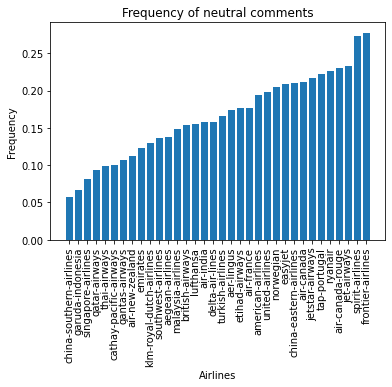

In [ ]:
f, ax = plt.subplots()

companies = df_neutral['airline']
freq = df_neutral['freq']

plt.bar(companies, freq)
plt.title("Frequency of neutral comments")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_neutral['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [ ]:
df_anger = df[df['labelsstring'].apply(lambda x:"['anger']" in x)]
df_anger['freq'] = df_anger['airline'].apply(lambda x: (df_anger['airline'] == x).sum())/df_anger['occ']
df_anger = df_anger.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_anger = df_anger.sort_values(by=['freq'])
df_anger

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline,freq,count
17,garuda-indonesia,0.003781,2
31,thai-airways,0.004658,3
11,china-southern-airlines,0.007079,11
25,qatar-airways,0.007358,11
27,singapore-airlines,0.008538,8
9,cathay-pacific-airways,0.008729,9
21,lufthansa,0.009129,13
24,qantas-airways,0.009419,12
22,malaysia-airlines,0.009569,8
0,aegean-airlines,0.009843,5


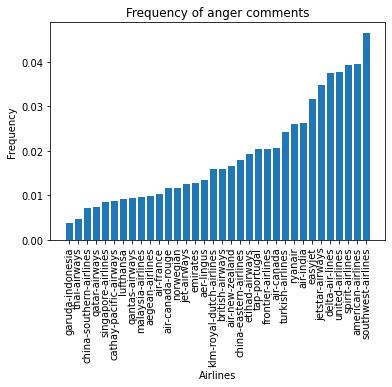

In [ ]:
f, ax = plt.subplots()

companies = df_anger['airline']
freq = df_anger['freq']

plt.bar(companies, freq)
plt.title("Frequency of anger comments")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_anger['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [ ]:
df_fear = df[df['labelsstring'].apply(lambda x:"['fear']" in x)]
df_fear['freq'] = df_fear['airline'].apply(lambda x: (df_fear['airline'] == x).sum())/df_fear['occ']
df_fear = df_fear.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_fear = df_fear.sort_values(by=['freq'])
df_fear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline,freq,count
24,qatar-airways,0.002007,3
30,thai-airways,0.003106,2
0,aegean-airlines,0.003937,2
11,china-southern-airlines,0.005148,8
26,singapore-airlines,0.005336,5
9,cathay-pacific-airways,0.005820,6
6,air-new-zealand,0.007339,4
22,norwegian,0.007479,7
8,british-airways,0.007749,18
17,jet-airways,0.008368,6


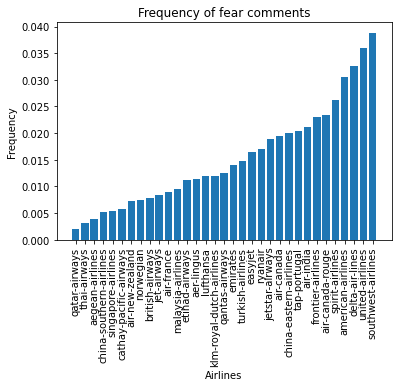

In [ ]:
f, ax = plt.subplots()

companies = df_fear['airline']
freq = df_fear['freq']

plt.bar(companies, freq)
plt.title("Frequency of fear comments")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_fear['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [ ]:
df_disgust = df[df['labelsstring'].apply(lambda x:"['disgust']" in x)]
df_disgust['freq'] = df_disgust['airline'].apply(lambda x: (df_disgust['airline'] == x).sum())/df_disgust['occ']
df_disgust = df_disgust.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_disgust = df_disgust.sort_values(by=['freq'])
df_disgust

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline,freq,count
11,china-southern-airlines,0.001931,3
0,aegean-airlines,0.001969,1
17,garuda-indonesia,0.003781,2
1,aer-lingus,0.003831,2
25,qatar-airways,0.004013,6
27,singapore-airlines,0.004269,4
14,emirates,0.007020,11
24,qantas-airways,0.007064,9
21,lufthansa,0.007725,11
31,thai-airways,0.007764,5


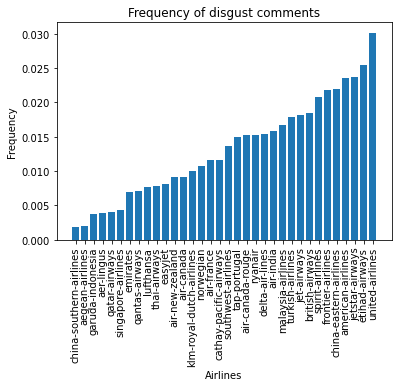

In [ ]:
f, ax = plt.subplots()

companies = df_disgust['airline']
freq = df_disgust['freq']

plt.bar(companies, freq)
plt.title("Frequency of disgust comments")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_disgust['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [ ]:
df_joy_surprise = df[df['labelsstring'].apply(lambda x:"['joy', 'surprise']" in x)]
df_joy_surprise['freq'] = df_joy_surprise['airline'].apply(lambda x: (df_joy_surprise['airline'] == x).sum())/df_joy_surprise['occ']
df_joy_surprise = df_joy_surprise.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_joy_surprise = df_joy_surprise.sort_values(by=['freq'])
df_joy_surprise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline,freq,count
28,southwest-airlines,0.029126,15
1,aer-lingus,0.034483,18
22,malaysia-airlines,0.039474,33
2,air-canada,0.043678,38
13,easyjet,0.046784,40
18,jet-airways,0.047420,34
16,frontier-airlines,0.048593,38
7,american-airlines,0.049237,71
33,united-airlines,0.049645,84
15,etihad-airways,0.050000,49


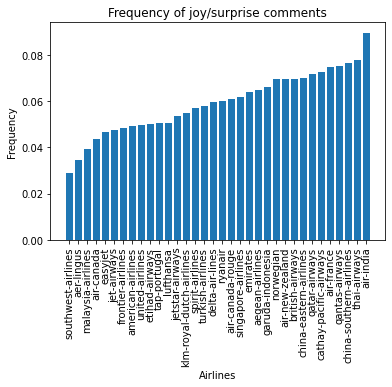

In [ ]:
f, ax = plt.subplots()

companies = df_joy_surprise['airline']
freq = df_joy_surprise['freq']

plt.bar(companies, freq)
plt.title("Frequency of joy/surprise comments")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_joy_surprise['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [ ]:
df_anger_surprise = df[df['labelsstring'].apply(lambda x:"['anger', 'surprise']" in x)]
df_anger_surprise['freq'] = df_anger_surprise['airline'].apply(lambda x: (df_anger_surprise['airline'] == x).sum())/df_anger_surprise['occ']
df_anger_surprise = df_anger_surprise.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_anger_surprise = df_anger_surprise.sort_values(by=['freq'])
df_anger_surprise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline,freq,count
9,china-southern-airlines,0.000644,1
23,qatar-airways,0.000669,1
7,cathay-pacific-airways,0.000970,1
25,singapore-airlines,0.001067,1
16,jet-airways,0.001395,1
29,thai-airways,0.001553,1
3,air-india,0.001757,1
4,air-new-zealand,0.001835,1
15,garuda-indonesia,0.001890,1
0,aegean-airlines,0.001969,1


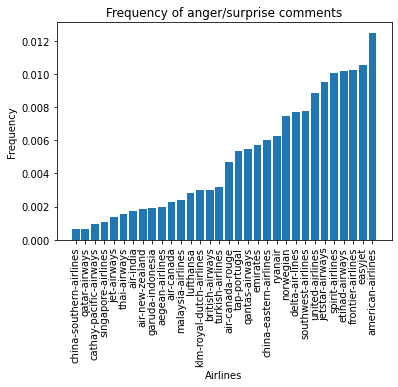

In [ ]:
f, ax = plt.subplots()

companies = df_anger_surprise['airline']
freq = df_anger_surprise['freq']

plt.bar(companies, freq)
plt.title("Frequency of anger/surprise comments")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_anger_surprise['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [ ]:
df_anger_sadness = df[df['labelsstring'].apply(lambda x:"['anger', 'sadness']" in x)]
df_anger_sadness['freq'] = df_anger_sadness['airline'].apply(lambda x: (df_anger_sadness['airline'] == x).sum())/df_anger_sadness['occ']
df_anger_sadness = df_anger_sadness.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_anger_sadness = df_anger_sadness.sort_values(by=['freq'])
df_anger_sadness

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline,freq,count
11,china-southern-airlines,0.000644,1
27,singapore-airlines,0.001067,1
31,thai-airways,0.001553,1
1,aer-lingus,0.001916,1
0,aegean-airlines,0.001969,1
25,qatar-airways,0.002676,4
21,lufthansa,0.002809,4
3,air-canada-rouge,0.003509,3
13,easyjet,0.003509,3
17,garuda-indonesia,0.003781,2


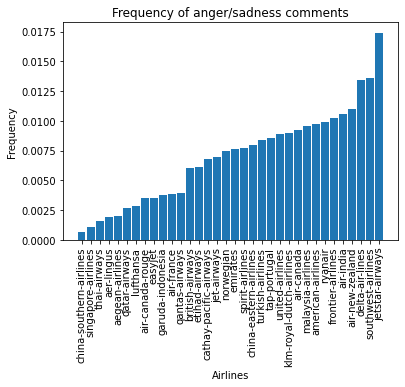

In [ ]:
f, ax = plt.subplots()

companies = df_anger_sadness['airline']
freq = df_anger_sadness['freq']

plt.bar(companies, freq)
plt.title("Frequency of anger/sadness comments")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_anger_sadness['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [ ]:
df_joy_sadness_surprise = df[df['labelsstring'].apply(lambda x:"['joy', 'sadness', 'surprise']" in x)]
df_joy_sadness_surprise['freq'] = df_joy_sadness_surprise['airline'].apply(lambda x: (df_joy_sadness_surprise['airline'] == x).sum())/df_joy_sadness_surprise['occ']
df_joy_sadness_surprise = df_joy_sadness_surprise.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_joy_sadness_surprise = df_joy_sadness_surprise.sort_values(by=['freq'])
df_joy_sadness_surprise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline,freq,count
21,qatar-airways,0.000669,1
17,lufthansa,0.000702,1
22,ryanair,0.000897,1
10,delta-air-lines,0.000961,1
19,norwegian,0.001068,1
2,air-canada-rouge,0.001170,1
27,united-airlines,0.001182,2
18,malaysia-airlines,0.001196,1
13,frontier-airlines,0.001279,1
3,air-france,0.001292,1


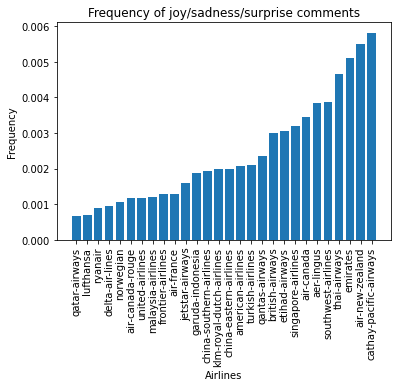

In [ ]:
f, ax = plt.subplots()

companies = df_joy_sadness_surprise['airline']
freq = df_joy_sadness_surprise['freq']

plt.bar(companies, freq)
plt.title("Frequency of joy/sadness/surprise comments")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_joy_sadness_surprise['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [ ]:
df_joy

,airline,freq,count
29,spirit-airlines,0.145174,188
16,frontier-airlines,0.158568,124
33,united-airlines,0.176714,299
7,american-airlines,0.180305,260
3,air-canada-rouge,0.183626,157
19,jetstar-airways,0.210443,133
26,ryanair,0.236771,264
15,etihad-airways,0.242857,238
30,tap-portugal,0.244373,228
10,china-eastern-airlines,0.265469,133


In [ ]:
#df_joy_seat = df_joy[df_joy['LDA Topics'].apply(lambda x:"seat" in x)]
#len(df_joy["uncomfortable" in df_joy['LDA Topics']])/len(df_joy)
df_joy_seat

NameError: ignored

In [ ]:
df_joy_2 = df[df['labelsstring'].apply(lambda x:"['joy']" in x)]
df_joy_2 = df_joy_2[df_joy_2['LDA'].apply(lambda x:"seat" in x)]
df_joy_2['freq'] = df_joy_2['airline'].apply(lambda x: (df_joy_2['airline'] == x).sum())/df_joy_2['occ']
df_joy_2 = df_joy_2.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_joy_2 = df_joy_2.sort_values(by=['freq'])
df_joy_2

,airline,freq,count
29,spirit-airlines,0.060232,78
16,frontier-airlines,0.067775,53
33,united-airlines,0.116430,197
7,american-airlines,0.122746,177
28,southwest-airlines,0.145631,75
26,ryanair,0.153363,171
19,jetstar-airways,0.153481,97
3,air-canada-rouge,0.160234,137
15,etihad-airways,0.197959,194
30,tap-portugal,0.201501,188


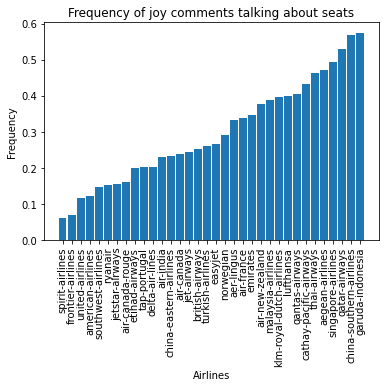

In [ ]:
f, ax = plt.subplots()

companies = df_joy_2['airline']
freq = df_joy_2['freq']

plt.bar(companies, freq)
plt.title("Frequency of joy comments talking about seats")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_joy['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [ ]:
df_anger_2 = df[df['labelsstring'].apply(lambda x:"['anger']" in x)]
df_anger_2 = df_anger_2[df_anger_2['LDA'].apply(lambda x:"seat" in x)]
df_anger_2['freq'] = df_anger_2['airline'].apply(lambda x: (df_anger_2['airline'] == x).sum())/df_anger_2['occ']
df_anger_2 = df_anger_2.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_anger_2 = df_anger_2.sort_values(by=['freq'])
df_anger_2

In [ ]:
df_anger_3 = pd.concat([df_anger_2.head(3),df_anger_2.tail(3)])
df_anger_3.sort_values(by=['freq'])

,airline,freq,count
23,norwegian,0.001068,1
0,aegean-airlines,0.001969,1
32,turkish-airlines,0.002107,2
12,delta-air-lines,0.011527,12
28,southwest-airlines,0.011650,6
10,china-eastern-airlines,0.011976,6


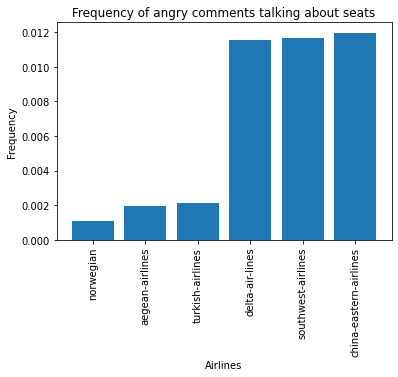

In [134]:
f, ax = plt.subplots()

companies = df_anger_3['airline']
freq = df_anger_3['freq']

plt.bar(companies, freq)
plt.title("Frequency of angry comments talking about seats")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_anger_3['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [135]:
df_joy_seat = df[df['labelsstring'].apply(lambda x:"['joy']" in x)]
df_joy_seat = df_joy_seat[df_joy_seat['LDA'].apply(lambda x:"seat" in x)]
df_joy_seat['freq'] = df_joy_seat['airline'].apply(lambda x: (df_joy_seat['airline'] == x).sum())/df_joy_seat['occ']
df_joy_seat = df_joy_seat.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_joy_seat = df_joy_seat.sort_values(by=['freq'])
df_joy_seat

,airline,freq,count
29,spirit-airlines,0.060232,78
16,frontier-airlines,0.067775,53
33,united-airlines,0.116430,197
7,american-airlines,0.122746,177
28,southwest-airlines,0.145631,75
26,ryanair,0.153363,171
19,jetstar-airways,0.153481,97
3,air-canada-rouge,0.160234,137
15,etihad-airways,0.197959,194
30,tap-portugal,0.201501,188


In [136]:
df_joy_seat_1 = pd.concat([df_joy_seat.head(3),df_joy_seat.tail(3)])
df_joy_seat_1.sort_values(by=['freq'])

,airline,freq,count
29,spirit-airlines,0.060232,78
16,frontier-airlines,0.067775,53
33,united-airlines,0.116430,197
25,qatar-airways,0.528428,790
11,china-southern-airlines,0.568211,883
17,garuda-indonesia,0.574669,304


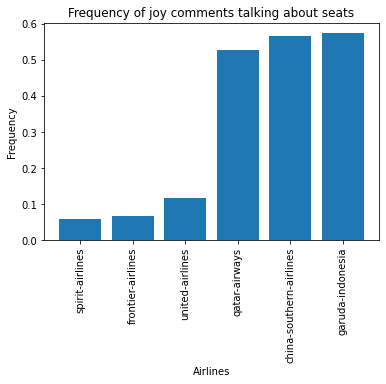

In [137]:
f, ax = plt.subplots()

companies = df_joy_seat_1['airline']
freq = df_joy_seat_1['freq']

plt.bar(companies, freq)
plt.title("Frequency of joy comments talking about seats")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_joy_seat_1['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [138]:
df_joy_leg = df[df['labelsstring'].apply(lambda x:"['joy']" in x)]
df_joy_leg = df_joy_leg[df_joy_leg['LDA'].apply(lambda x:"leg" in x)]
df_joy_leg['freq'] = df_joy_leg['airline'].apply(lambda x: (df_joy_leg['airline'] == x).sum())/df_joy_leg['occ']
df_joy_leg = df_joy_leg.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_joy_leg = df_joy_leg.sort_values(by=['freq'])
df_joy_leg

,airline,freq,count
10,china-eastern-airlines,0.001996,1
17,garuda-indonesia,0.003781,2
11,china-southern-airlines,0.005148,8
5,air-india,0.005272,3
30,tap-portugal,0.005359,5
18,jet-airways,0.005579,4
15,etihad-airways,0.007143,7
32,turkish-airlines,0.007376,7
0,aegean-airlines,0.007874,4
23,norwegian,0.008547,8


In [139]:
df_joy_leg_1 = pd.concat([df_joy_leg.head(3),df_joy_leg.tail(3)])
df_joy_leg_1.sort_values(by=['freq'])

,airline,freq,count
10,china-eastern-airlines,0.001996,1
17,garuda-indonesia,0.003781,2
11,china-southern-airlines,0.005148,8
28,southwest-airlines,0.023301,12
6,air-new-zealand,0.027523,15
3,air-canada-rouge,0.052632,45


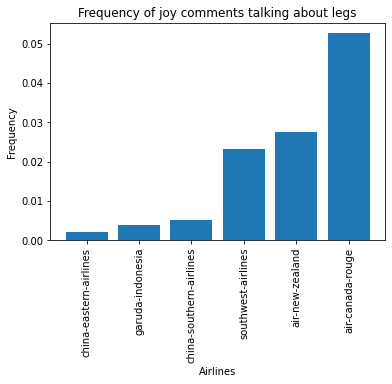

In [140]:
f, ax = plt.subplots()

companies = df_joy_leg_1['airline']
freq = df_joy_leg_1['freq']

plt.bar(companies, freq)
plt.title("Frequency of joy comments talking about legs")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_joy_leg_1['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [141]:
df_surprise_leg = df[df['labelsstring'].apply(lambda x:"['surprise']" in x)]
df_surprise_leg = df_surprise_leg[df_surprise_leg['LDA'].apply(lambda x:"leg" in x)]
df_surprise_leg['freq'] = df_surprise_leg['airline'].apply(lambda x: (df_surprise_leg['airline'] == x).sum())/df_surprise_leg['occ']
df_surprise_leg = df_surprise_leg.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_surprise_leg = df_surprise_leg.sort_values(by=['freq'])
df_surprise_leg

,airline,freq,count
17,garuda-indonesia,0.001890,1
25,qatar-airways,0.002007,3
23,norwegian,0.002137,2
31,thai-airways,0.003106,2
0,aegean-airlines,0.003937,2
10,china-eastern-airlines,0.003992,2
30,tap-portugal,0.004287,4
11,china-southern-airlines,0.004505,7
24,qantas-airways,0.005495,7
21,lufthansa,0.005618,8


In [142]:
df_surprise_leg_1 = pd.concat([df_surprise_leg.head(3),df_surprise_leg.tail(3)])
df_surprise_leg_1.sort_values(by=['freq'])

,airline,freq,count
17,garuda-indonesia,0.001890,1
25,qatar-airways,0.002007,3
23,norwegian,0.002137,2
12,delta-air-lines,0.018252,19
6,air-new-zealand,0.020183,11
3,air-canada-rouge,0.071345,61


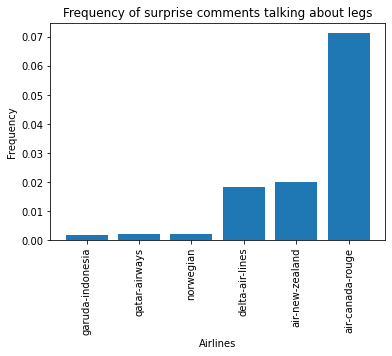

In [143]:
f, ax = plt.subplots()

companies = df_surprise_leg_1['airline']
freq = df_surprise_leg_1['freq']

plt.bar(companies, freq)
plt.title("Frequency of surprise comments talking about legs")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_surprise_leg_1['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [144]:
df_business_angry = df[df['labelsstring'].apply(lambda x:"['joy']" in x)]
df_business_angry = df_business_angry[df_business_angry['LDA'].apply(lambda x:"business" in x)]
df_business_angry['freq'] = df_business_angry['airline'].apply(lambda x: (df_business_angry['airline'] == x).sum())/df_business_angry['occ']
df_business_angry = df_business_angry.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_business_angry = df_business_angry.sort_values(by=['freq'])

In [145]:
df_business_angry_1 = pd.concat([df_business_angry.head(3),df_business_angry.tail(3)])
df_business_angry_1.sort_values(by=['freq'])

,airline,freq,count
12,delta-air-lines,0.000961,1
10,china-eastern-airlines,0.001996,1
3,air-canada-rouge,0.002339,2
23,qatar-airways,0.018729,28
8,british-airways,0.018941,44
4,air-france,0.020672,16


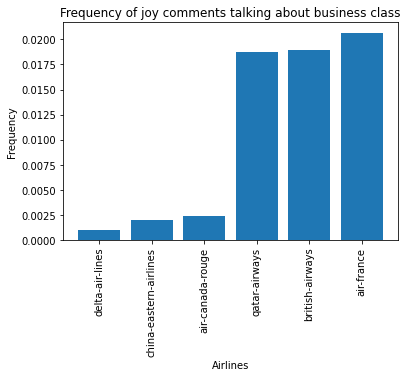

In [146]:
f, ax = plt.subplots()

companies = df_business_angry_1['airline']
freq = df_business_angry_1['freq']

plt.bar(companies, freq)
plt.title("Frequency of joy comments talking about business class")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_business_angry_1['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [147]:
df_economy_joy = df[df['labelsstring'].apply(lambda x:"['surprise']" in x)]
df_economy_joy = df_economy_joy[df_economy_joy['LDA'].apply(lambda x:"economy" in x)]
df_economy_joy['freq'] = df_economy_joy['airline'].apply(lambda x: (df_economy_joy['airline'] == x).sum())/df_economy_joy['occ']
df_economy_joy = df_economy_joy.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_economy_joy = df_economy_joy.sort_values(by=['freq'])

In [148]:
df_economy_joy_1 = pd.concat([df_economy_joy.head(3),df_economy_joy.tail(3)])
df_economy_joy_1.sort_values(by=['freq'])

,airline,freq,count
3,air-canada-rouge,0.001170,1
16,jetstar-airways,0.001582,1
27,united-airlines,0.001773,3
21,qantas-airways,0.010204,13
8,british-airways,0.013775,32
25,thai-airways,0.013975,9


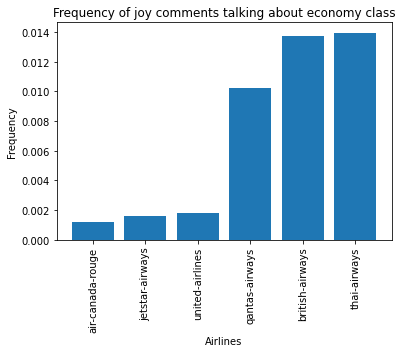

In [149]:
f, ax = plt.subplots()

companies = df_economy_joy_1['airline']
freq = df_economy_joy_1['freq']

plt.bar(companies, freq)
plt.title("Frequency of joy comments talking about economy class")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_economy_joy_1['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [150]:
df_experience_joy = df[df['labelsstring'].apply(lambda x:"['joy']" in x)]
df_experience_joy = df_experience_joy[df_experience_joy['LDA'].apply(lambda x:"experience" in x)]
df_experience_joy['freq'] = df_experience_joy['airline'].apply(lambda x: (df_experience_joy['airline'] == x).sum())/df_experience_joy['occ']
df_experience_joy = df_experience_joy.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_experience_joy = df_experience_joy.sort_values(by=['freq'])

In [151]:
df_experience_joy_1 = pd.concat([df_experience_joy.head(3),df_experience_joy.tail(3)])
df_experience_joy_1.sort_values(by=['freq'])

,airline,freq,count
14,emirates,0.008296,13
31,thai-airways,0.009317,6
22,malaysia-airlines,0.009569,8
29,spirit-airlines,0.062548,81
16,frontier-airlines,0.067775,53
28,southwest-airlines,0.100971,52


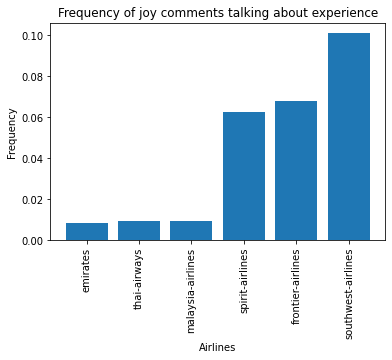

In [152]:
f, ax = plt.subplots()

companies = df_experience_joy_1['airline']
freq = df_experience_joy_1['freq']

plt.bar(companies, freq)
plt.title("Frequency of joy comments talking about experience")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_experience_joy_1['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [153]:
df_test = df[df['labelsstring'].apply(lambda x:"['joy']" in x)]
df_test = df_test[df_test['LDA'].apply(lambda x:"seat" in x)]
text = df_test['Text']

In [154]:
low_cost = df[df['Low Cost'] == True]
traditional = df[df['Low Cost'] == False]

In [155]:
df_low_cost_joy_seat = low_cost[low_cost['labelsstring'].apply(lambda x:"['joy']" in x)]
df_low_cost_joy_seat = df_low_cost_joy_seat[df_low_cost_joy_seat['LDA'].apply(lambda x:"seat" in x)]
df_low_cost_joy_seat['freq'] = df_low_cost_joy_seat['airline'].apply(lambda x: (df_low_cost_joy_seat['airline'] == x).sum())/df_low_cost_joy_seat['occ']
df_low_cost_joy_seat = df_low_cost_joy_seat.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_low_cost_joy_seat = df_low_cost_joy_seat.sort_values(by=['freq'])

In [156]:
df_low_cost_joy_seat_1 = pd.concat([df_low_cost_joy_seat.head(3),df_low_cost_joy_seat.tail(3)])
df_low_cost_joy_seat_1.sort_values(by=['freq'])

,airline,freq,count
10,spirit-airlines,0.060232,78
4,frontier-airlines,0.067775,53
9,southwest-airlines,0.145631,75
5,jet-airways,0.242678,174
3,easyjet,0.266667,228
7,norwegian,0.290598,272


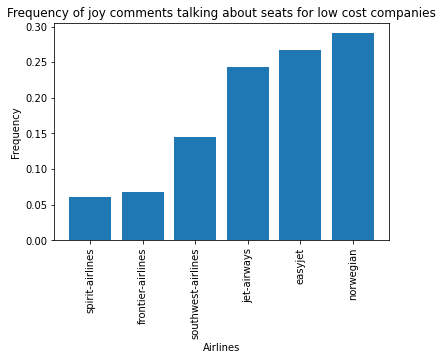

In [157]:
f, ax = plt.subplots()

companies = df_low_cost_joy_seat_1['airline']
freq = df_low_cost_joy_seat_1['freq']

plt.bar(companies, freq)
plt.title("Frequency of joy comments talking about seats for low cost companies")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_low_cost_joy_seat_1['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [158]:
df_traditional_joy_seat = traditional[traditional['labelsstring'].apply(lambda x:"['joy']" in x)]
df_traditional_joy_seat = df_traditional_joy_seat[df_traditional_joy_seat['LDA'].apply(lambda x:"seat" in x)]
df_traditional_joy_seat['freq'] = df_traditional_joy_seat['airline'].apply(lambda x: (df_traditional_joy_seat['airline'] == x).sum())/df_traditional_joy_seat['occ']
df_traditional_joy_seat = df_traditional_joy_seat.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_traditional_joy_seat = df_traditional_joy_seat.sort_values(by=['freq'])

In [159]:
df_traditional_joy_seat_1 = pd.concat([df_traditional_joy_seat.head(3),df_traditional_joy_seat.tail(3)])
df_traditional_joy_seat_1.sort_values(by=['freq'])

,airline,freq,count
22,united-airlines,0.116430,197
4,american-airlines,0.122746,177
11,etihad-airways,0.197959,194
17,qatar-airways,0.528428,790
8,china-southern-airlines,0.568211,883
12,garuda-indonesia,0.574669,304


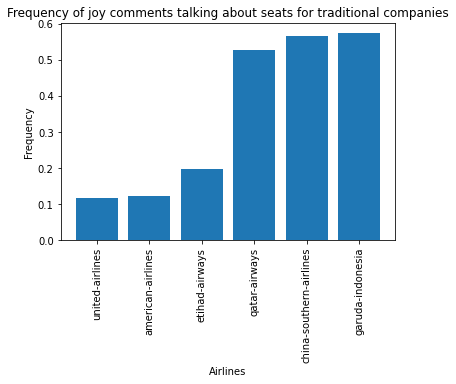

In [160]:
f, ax = plt.subplots()

companies = df_traditional_joy_seat_1['airline']
freq = df_traditional_joy_seat_1['freq']

plt.bar(companies, freq)
plt.title("Frequency of joy comments talking about seats for traditional companies")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_traditional_joy_seat_1['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [173]:
df_disgust_flight = traditional[traditional['labelsstring'].apply(lambda x:"['fear']" in x)]
df_disgust_flight = df_disgust_flight[df_disgust_flight['LDA'].apply(lambda x:"flight" in x)]
df_disgust_flight['freq'] = df_disgust_flight['airline'].apply(lambda x: (df_disgust_flight['airline'] == x).sum())/df_disgust_flight['occ']
df_disgust_flight = df_disgust_flight.groupby(['airline','freq']).size().reset_index().rename(columns={0:'count'})
df_disgust_flight = df_disgust_flight.sort_values(by=['freq'])

In [174]:
df_disgust_flight_1 = pd.concat([df_disgust_flight.head(3),df_disgust_flight.tail(3)])
df_disgust_flight_1.sort_values(by=['freq'])

,airline,freq,count
16,qatar-airways,0.001338,2
19,thai-airways,0.003106,2
6,cathay-pacific-airways,0.003880,4
4,american-airlines,0.029126,42
9,delta-air-lines,0.032661,34
21,united-airlines,0.035461,60


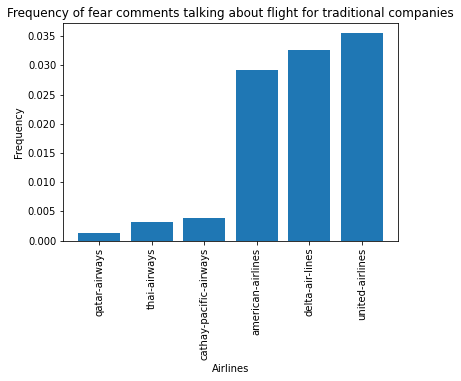

In [175]:
f, ax = plt.subplots()

companies = df_disgust_flight_1['airline']
freq = df_disgust_flight_1['freq']

plt.bar(companies, freq)
plt.title("Frequency of fear comments talking about flight for traditional companies")
plt.xlabel("Airlines")
plt.ylabel("Frequency")
ax.set_xticks(range(len(df_disgust_flight_1['airline'])))
ax.set_xticklabels(companies, rotation=90)

plt.show()

In [161]:
text

3052     very pleased with the crew and the service  I ...
3053     very good in-flight service  Aircraft new and ...
3054     Smooth flight, landed on time  Check in area a...
3056     A superb flight  Aegean check-in was busy but ...
3060     great airline to travel with  Totally disagree...
                               ...                        
61690    nited Airlines customer revie ["LHR-ORD on 25 ...
61698    nited Airlines customer revie ['Flew FRA-EWR a...
61702    nited Airlines customer revie ["LAX-JFK EWR-LA...
61710    nited Airlines customer revie ['YOW-ORD-HNL-LI...
61714    nited Airlines customer revie ["Flew LAX-SFO-O...
Name: Text, Length: 9952, dtype: object

In [162]:
text.to_csv('/content/drive/Shareddrives/Hackathon/textsjoy.csv')